In [12]:
import gym

import plotting
from learning_functions import double_Q_Learning, sarsa, qLearning, avg_res

In [13]:
from gym.envs.registration import register

register(
        id='Gridworld33-v0',
        entry_point='grid33:Gridworld33Env',
        )

/home/ania/PycharmProjects/reinforcement/venv/lib/python3.8/site-packages/gym/envs/registration.py:516: UserWarning: WARN: Overriding environment Gridworld33-v0
  logger.warn(f"Overriding environment {spec.id}")


In [14]:
env = gym.make('Gridworld33-v0')

In [15]:
state = env.reset()

In [16]:
print('State space: ', env.observation_space)
print('Action space: ', env.action_space)
print('Reward range: ', env.reward_range)

State space:  Tuple(Discrete(3), Discrete(3))
Action space:  Discrete(4)
Reward range:  (-12, 10)


In [17]:
num_episodes = 100
params = {
    "qleaning": {"fun": qLearning, "args": (env, num_episodes), "res": []},
    "sarsa": {"fun": sarsa, "args": (env, num_episodes), "res": []},
    "double": {"fun": double_Q_Learning, "args": (env, num_episodes), "res": []}
}

In [18]:
for _ in range(30):
    for key, val in params.items():
        val["res"].append(val["fun"](*val["args"]))

In [19]:
res_avg = {name: avg_res(params[name]["res"]) for name in ("double", "qleaning", "sarsa")}

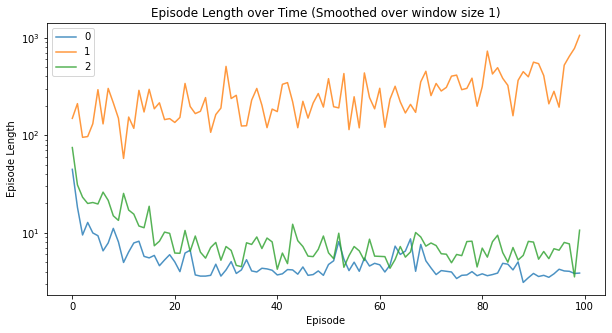

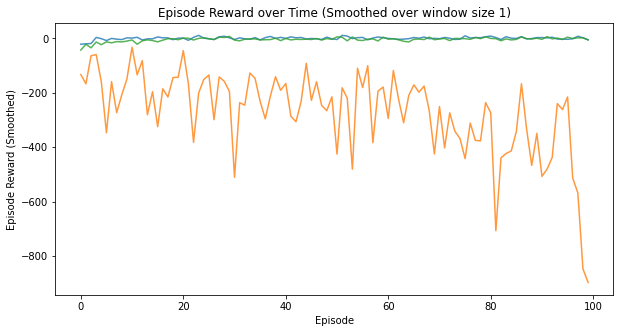

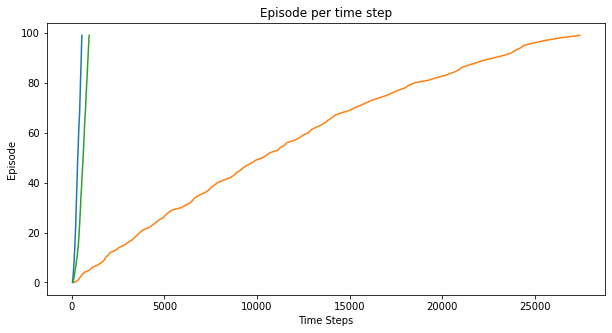

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [20]:
plotting.plot_episode_stats_multiple(res_avg["double"][1], res_avg["qleaning"][1], res_avg["sarsa"][1], smoothing_window=1)

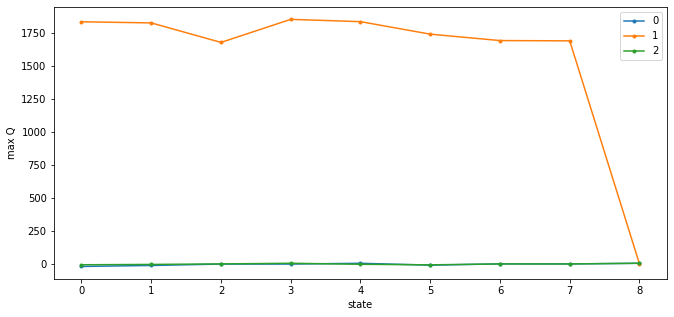

In [21]:
plotting.plot_max_Q(res_avg)

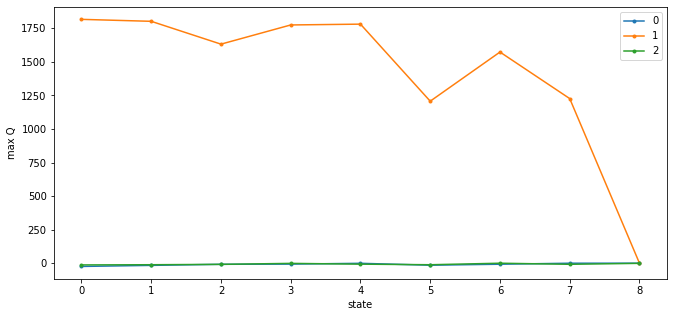

In [22]:
plotting.plot_mean_Q(res_avg)

# Komenatrz
Ta gra odpowiada grze z publikacji Hasselt, Hado. "Double Q-learning." Advances in neural information processing systems 23 (2010).
Gracz porusza się do celu po planszy 3x3, za każdy ruch dostaje 10 lub -12 punktów, losowo. Za ruch z pola końcowego dostaje 5 punktów. Wartość oczekiwana optymalnej gry wynosi 1.

### Q-learning
Algorytm radzi sobie najgorzej -- długość epizodu w miarę uczenia rośnie, zamiast maleć, co przekłada się na malejącą nagrodę. Algorytm przeszacowuje wartość Q dla bieżącego stanu (jak widać na wykresach), co prowadzi do mniejszej szansy odwiedzenia nowych stanów, w tym stanu końcowego i błądzenie po planszy.

### Double Q-learning i SARSA
Algorytm double Q-learning jest odporny na przeszacowanie wartości danej akcji, spowodowanej losową wartością nagrody. Radzi sobie lepiej niż SARSA -- trochę szybciej się uczy i umożliwia zakończenie gry w średnio mniejszej liczbie ruchów.

### Który z algorytmów jest najlepszy?
Żaden nie jest najlepszy dla wszystkich gier. Można za to wskazać algorytm, który dobrze sprawdza się dla danej gry. ("No free lunch theorem")